## **PREDICTING CHRONIC KIDNEY DISEASE IN PATIENTS**

**Lab Exercise**

## Step 1: Define the problem.

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.
    
Data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.


## Step 2: Obtain the data.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('chronic_kidney_disease_full.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Step 3: Explore the data.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [43]:
# Check null value

df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [44]:
# Dummify categorical columns

df = pd.get_dummies(df, drop_first=False, dtype=int)
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,0,1,1,0,0,1,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0


<Axes: >

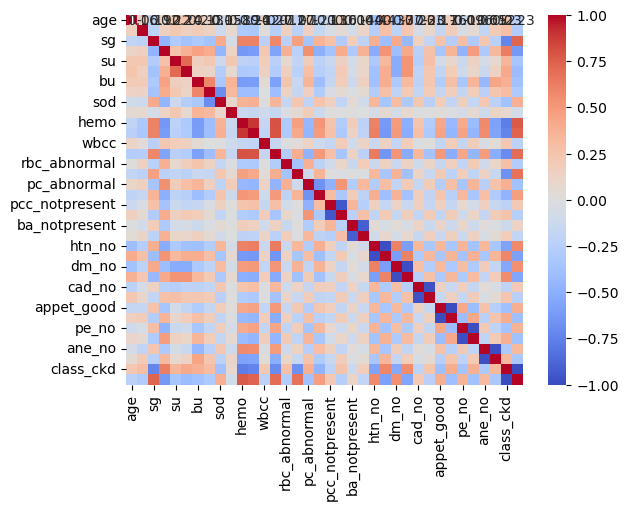

In [45]:
# Create a heat map to find correlation

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

## Step 4: Model the data.

In [46]:
# Impute missing values with mode Imputation
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print(df)

      age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...  cad_no  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2  135.0  3.5  ...       1   
1     7.0  50.0  1.020  4.0  0.0   99.0  18.0  0.8  135.0  3.5  ...       1   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8  135.0  3.5  ...       1   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...       1   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4  135.0  3.5  ...       1   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...  ...     ...   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  ...       1   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  ...       1   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  ...       1   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  ...       1   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  ...       1   

     cad_yes  appet_good  appet_poor  pe_no  pe_yes

In [47]:
# Impute missing values with Predictive Imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# # Convert categorical columns to numeric for imputation
# df_encoded = pd.get_dummies(df, drop_first=True)

# Impute missing values
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = imputer.fit_transform(df)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed)


      age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...  cad_no  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2  135.0  3.5  ...     1.0   
1     7.0  50.0  1.020  4.0  0.0   99.0  18.0  0.8  135.0  3.5  ...     1.0   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8  135.0  3.5  ...     1.0   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...     1.0   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4  135.0  3.5  ...     1.0   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...  ...     ...   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  ...     1.0   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  ...     1.0   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  ...     1.0   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  ...     1.0   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  ...     1.0   

     cad_yes  appet_good  appet_poor  pe_no  pe_yes

In [48]:
df_imputed

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd,class_notckd
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,135.0,3.5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,3.5,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,135.0,3.5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [49]:
df.iloc[0] #checking if has CKD = 1, no CKD = 0

age                 48.00
bp                  80.00
sg                   1.02
al                   1.00
su                   0.00
bgr                121.00
bu                  36.00
sc                   1.20
sod                135.00
pot                  3.50
hemo                15.40
pcv                 44.00
wbcc              7800.00
rbcc                 5.20
rbc_abnormal         0.00
rbc_normal           0.00
pc_abnormal          0.00
pc_normal            1.00
pcc_notpresent       1.00
pcc_present          0.00
ba_notpresent        1.00
ba_present           0.00
htn_no               0.00
htn_yes              1.00
dm_no                0.00
dm_yes               1.00
cad_no               1.00
cad_yes              0.00
appet_good           1.00
appet_poor           0.00
pe_no                1.00
pe_yes               0.00
ane_no               1.00
ane_yes              0.00
class_ckd            1.00
class_notckd         0.00
Name: 0, dtype: float64

In [50]:
# Perform train/test 
# Step 1: Split into training & testing sets
features = df[['class_ckd','class_notckd']]
X = df_imputed.drop(features, axis='columns')
y = df_imputed['class_ckd']   #change definition to 1 if has CKD and 0 if not have CKD

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [51]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(X_train, y_train)

C:\Users\60149\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# What is the accuracy of our baseline model?
y.value_counts(normalize=True)

class_ckd
1.0    0.625
0.0    0.375
Name: proportion, dtype: float64

In [53]:
# Train score. Out of 100 prediction, 91 model predicts correctly.
logreg.score(X_train, y_train)

0.9133333333333333

In [54]:
# Test score. Out of 100 prediction, 87 model predicts correctly.
logreg.score(X_test, y_test)

0.93

In [55]:
y_train.value_counts(normalize=True)

class_ckd
1.0    0.616667
0.0    0.383333
Name: proportion, dtype: float64

## Step 5: Evaluate the model.

In [56]:
# coefficient of one of your quantitative features.
# Pair the coefficients with the feature names
coef_df = pd.DataFrame(logreg.coef_, columns=X.columns)

print(coef_df['bp'])

0    0.065376
Name: bp, dtype: float64


In [57]:
# coefficient of one of your categorical/dummy features.

print(coef_df['htn_yes'])

0    0.027648
Name: htn_yes, dtype: float64


In [58]:
# Generating Confusion Matrix
# Generate predictions.
preds = logreg.predict(X_test)
preds

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.])

In [59]:
cm = confusion_matrix(y_test, #True value
                      preds) #predicted values
cm

array([[32,  3],
       [ 4, 61]], dtype=int64)

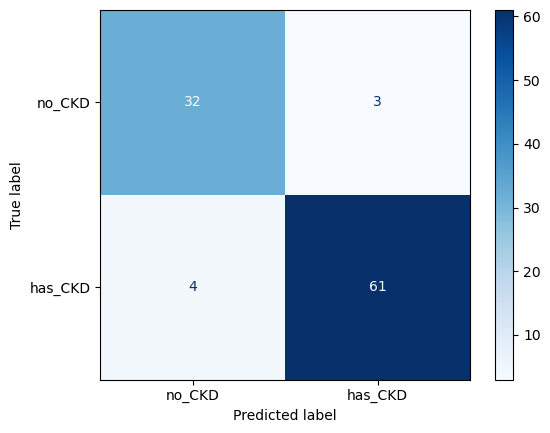

In [60]:
# plot Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_CKD', 'has_CKD'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Do we want to optimize for sensitivity, specificity, or something else? Why?

Answer:
I want to increase:
    1. Accuracy, as I am interested in people who truly has CKD and without CKD.
    2. Sensitivity, as it's more important to know all the patients who has CKD (TP), especially those wrongly diagnosed as not having CKD but actually has.
    3. Precision, because we want to increase the real patients who truly has CKD (TP), and minimize the ones that have False Positive.

**Create a function tof ROC Curve, then plot the ROC curve.**

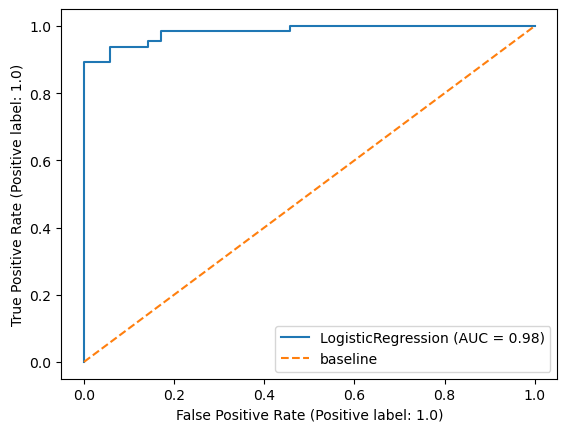

In [61]:
# Plot ROC curve using RocCurveDisplay
disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
# disp.plot()

# Plot baseline, using threshold 0.5
plt.plot([0, 1], [0, 1], linestyle='--', label='baseline')

#add legend
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import accuracy_score

# Define the get_predictions function
def get_predictions(proba, threshold):
    return (proba >= threshold).astype(int)

# List of thresholds
threshold_list = [0.25, 0.4, 0.5, 0.6, 0.75]

# Loop through the thresholds and calculate accuracy
for threshold in threshold_list:
    preds = get_predictions(logreg.predict_proba(X_test)[:,1], threshold)
    acc = accuracy_score(y_test, preds)
    print(f'Threshold: {threshold}, Accuracy: {acc}')


Threshold: 0.25, Accuracy: 0.86
Threshold: 0.4, Accuracy: 0.93
Threshold: 0.5, Accuracy: 0.93
Threshold: 0.6, Accuracy: 0.93
Threshold: 0.75, Accuracy: 0.92


**Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?**

Answer:
1. Poor Model Generalization
Models trained on unbalanced data may not generalize well to unseen data, especially if the minority class is underrepresented. This can lead to poor performance in real-world applications where the minority class may be critical. For example, in fraud detection, the minority class (fraud cases) is more important to identify accurately than the majority class (non-fraud cases).

2. Bias Towards Majority Class
When classes are unbalanced, the classifier can become biased towards the majority class. This means the model may predict the majority class most of the time, achieving high overall accuracy but performing poorly on the minority class. For example, in a dataset with 95% class A and 5% class B, a model that always predicts class A would have 95% accuracy but would completely fail to identify class B instances.

3. Skewed Loss Function
Most machine learning algorithms aim to minimize a loss function that aggregates errors across all classes. In unbalanced datasets, the loss is dominated by the majority class, leading to suboptimal updates to the model parameters for the minority class. This further entrenches the bias towards the majority class.

Creating very unbalanced classes just for the sake of this example! Generate very unbalanced classes by BOOTSTRAPPING,(a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [83]:
# Step 1: Split into training & testing sets
# features = df[['class_ckd','class_notckd']]
X = df.drop('class_ckd', axis='columns')
y = df['class_ckd']   

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [84]:
X_train.sample(n = 200000,
               replace = True,
               random_state = 42)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_notckd
283,60.0,70.0,1.020,0.0,0.0,99.0,46.0,1.2,135.0,3.5,...,0,1,0,1,0,1,0,1,0,1
344,64.0,60.0,1.020,0.0,0.0,106.0,27.0,0.7,150.0,3.3,...,0,1,0,1,0,1,0,1,0,1
38,69.0,80.0,1.020,3.0,0.0,99.0,103.0,4.1,132.0,5.9,...,0,1,0,1,0,1,0,1,0,0
69,26.0,70.0,1.015,0.0,4.0,250.0,20.0,1.1,135.0,3.5,...,1,1,0,1,0,1,0,1,0,0
98,50.0,140.0,1.020,0.0,0.0,101.0,106.0,6.5,135.0,4.3,...,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,38.0,80.0,1.020,0.0,0.0,99.0,19.0,0.5,147.0,3.5,...,0,1,0,1,0,1,0,1,0,1
236,65.0,80.0,1.020,0.0,0.0,74.0,66.0,2.0,136.0,5.4,...,1,0,1,1,0,0,1,1,0,0
1,7.0,50.0,1.020,4.0,0.0,99.0,18.0,0.8,135.0,3.5,...,0,1,0,1,0,1,0,1,0,0
27,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,...,1,0,1,1,0,0,1,1,0,0


In [85]:
# Instantiate DecisionTreeClassifier object.
tree = DecisionTreeClassifier(random_state=42)

In [86]:
# Fit and score on the training data.
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

1.0

In [87]:
# Score on the testing data.
tree.score(X_test, y_test)

1.0

C:\Users\60149\AppData\Local\Temp\ipykernel_2380\1698071934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.sample(n = X_train.shape[0], replace = True)['bgr']);
C:\Users\60149\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\60149\AppData\Local\Temp\ipykernel_2380\1698071934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

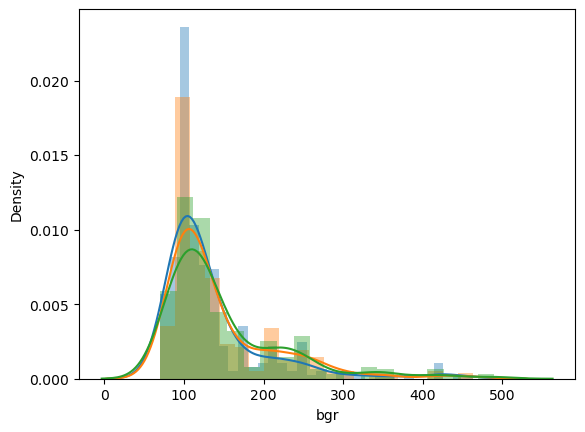

In [88]:
for i in range(3):
    sns.distplot(X_train.sample(n = X_train.shape[0], replace = True)['bgr']);

**Build a logistic regression model on the unbalanced class data and evaluate its performance**

In [127]:

majority_class = df[df['class_notckd'] == 0]
minority_class = df[df['class_notckd'] == 1]

# Generate a random sample of size 200,000 from the majority class with replacement
bootstrap_sample = majority_class.sample(n=200000, replace=True, random_state=42)

# Create a new DataFrame with the original data plus the bootstrap sample
df_unbalanced = pd.concat([df, bootstrap_sample], axis=0)

# Check the distribution to ensure it's highly unbalanced
print(df_unbalanced['class_notckd'].value_counts(normalize=True))

class_notckd
0    0.999251
1    0.000749
Name: proportion, dtype: float64


In [124]:
# Split the data into features (X) and target (y)
X = df_unbalanced.drop(columns=['class_notckd'])
y = df_unbalanced['class_notckd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Accuracy: 0.9999500998003992
Precision: 1.0
Recall: 0.9464285714285714
F1 Score: 0.9724770642201834
ROC AUC Score: 1.0


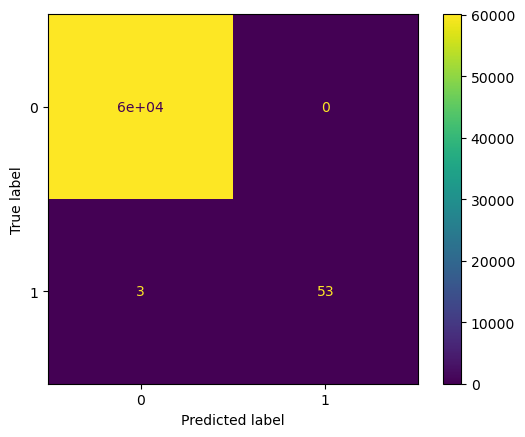

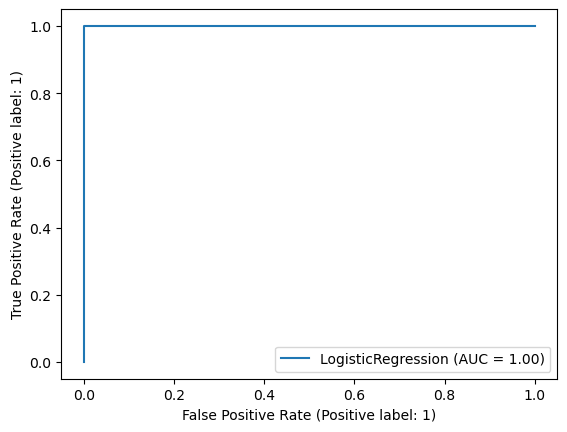

In [125]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
